In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import re

from sklearn.decomposition import PCA, SparsePCA,TruncatedSVD
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score
from pymongo import MongoClient
import re

from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


%matplotlib inline

In [2]:
city = 'Seattle'
state = 'WA'
client = MongoClient('localhost', 27017)
db = client['neighborhood_recommender']
collection = db['crime' + '_' + city + '_' + state]
cursor = collection.find()
data = [crime for crime in cursor]
df = pd.DataFrame(data)
counts = df.groupby(['hood','summarized_offense_description'])['offense_type'].count()
df = pd.DataFrame(counts).reset_index()
df = df.pivot(index = 'hood', values = 'offense_type', columns = 'summarized_offense_description')

cols_to_drop = ['MAIL THEFT','PORNOGRAPHY','HARBOR CALLs','EXTORTION','METRO','FRAUD AND FINANCIAL', 'LOITERING', 'LOST PROPERTY', 'OBSTRUCT', '[INC - CASE DC USE ONLY]', 'ESCAPE', 'FALSE REPORT', 'FORGERY', 'COUNTERFEIT', 'ELUDING', 'EMBEZZLE', 'FRAUD', 'INJURY', 'SHOPLIFTING', 'TRAFFIC', 'VIOLATION OF COURT ORDER', 'FIREWORK','ANIMAL COMPLAINT', 'DISPUTE', 'ILLEGAL DUMPING','RECKLESS BURNING', 'RECOVERED PROPERTY', 'BIAS INCIDENT', 'GAMBLE']
df = df[df.columns.difference(cols_to_drop)]	
names = df.index

In [3]:
cd Dimension\ Reduction

/Users/evansadler/Desktop/Project Files/Dimension Reduction


In [4]:
from pca_class import ReduceFeatures

In [10]:
rf = ReduceFeatures(df, names)
rf.preprocessing(0)
rf.hcluster_cols(0.3)
rf.preprocessing(0)
df_c = rf.sparse_pca(n_components = 3)
rf.best_cluster()

For n_clusters = 3 The average silhouette_score is : 0.64300979483
For n_clusters = 4 The average silhouette_score is : 0.657248337441
For n_clusters = 5 The average silhouette_score is : 0.62154829003
For n_clusters = 6 The average silhouette_score is : 0.499386531085
For n_clusters = 7 The average silhouette_score is : 0.490499936206
For n_clusters = 8 The average silhouette_score is : 0.514445327217
For n_clusters = 9 The average silhouette_score is : 0.528871156205
For n_clusters = 10 The average silhouette_score is : 0.508677343237


In [13]:
df_c.sort(2)

,1,2,3
[u'NARCOTICS' u'STAY OUT OF AREA OF DRUGS' u'WARRANT ARREST'],0.000000,-7.540756,0.000000
[u'DISORDERLY CONDUCT' u'LIQUOR VIOLATION' u'PUBLIC NUISANCE'],0.000000,-7.246634,0.000000
[u'ASSAULT' u'DISTURBANCE' u'OTHER PROPERTY' u'PICKPOCKET' u'PURSE SNATCH'\n u'ROBBERY' u'STOLEN PROPERTY' u'THEFT OF SERVICES' u'THREATS' u'TRESPASS'\n u'WEAPON'],-2.342362,-6.102140,0.000000
[u'BIKE THEFT' u'CAR PROWL' u'PROPERTY DAMAGE'],-4.889108,-3.596874,0.000000
HOMICIDE,-5.087744,-0.502357,0.000000
[u'PROSTITUTION' u'STAY OUT OF AREA OF PROSTITUTION'],0.000000,0.000000,-7.831761
[u'BURGLARY-SECURE PARKING-RES' u'DUI'],-6.397062,0.000000,0.000000
[u'BURGLARY' u'VEHICLE THEFT'],-7.218784,0.000000,0.000000


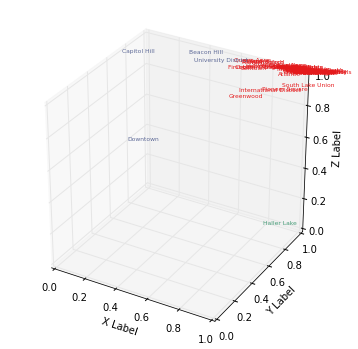

In [8]:
rf.plot_embedding()

In [5]:
client = MongoClient()
db = client['neighborhood_recommender']
collection = db['hood_data' + '_' + city + '_' + state]

hood_zillow = [hood for hood in collection.find()]
df_z = pd.DataFrame(hood_zillow, dtype = np.float64)
names = df_z['name'].values

In [6]:
df_z.drop(['latitude','longitude','id','_id','url', 'city','state', 'name'], axis = 1, inplace = True)
df_z = df_z.replace(['NA',''], np.nan)
df_z = pd.DataFrame(df_z.values,columns = df_z.columns, dtype = np.float64)


In [70]:
rf_z = ReduceFeatures(df_z, names )
rf_z.preprocessing(90)
rf_z.hcluster_cols(8)
rf_z.preprocessing()
df_cz = rf_z.sparse_pca(n_components = 3)
rf_z.best_cluster()

For n_clusters = 3 The average silhouette_score is : 0.372534897159
For n_clusters = 4 The average silhouette_score is : 0.410704979245
For n_clusters = 5 The average silhouette_score is : 0.395760810336
For n_clusters = 6 The average silhouette_score is : 0.401784987273
For n_clusters = 7 The average silhouette_score is : 0.411831643284
For n_clusters = 8 The average silhouette_score is : 0.358720581271
For n_clusters = 9 The average silhouette_score is : 0.358392857442
For n_clusters = 10 The average silhouette_score is : 0.370016903095


In [71]:
df_cz.sort(1)

,1,2,3
[u'Census Summary-AgeDecade: 40s' u'Census Summary-CommuteTime: 20-30min'\n u'Census Summary-RelationshipStatus: Divorced-Female'],-8.396288,0.891579,0.000000
[u'Census Summary-Occupancy: Own'\n u'Census Summary-RelationshipStatus: Married-Female'\n u'Census Summary-RelationshipStatus: Married-Male'\n u'Homes & Real Estate Data: Owners'],-8.095953,-4.116586,0.000000
[u'Census Summary-CommuteTime: 30-45min'\n u'Census Summary-CommuteTime: 45-60min'],-7.958299,0.000000,1.917215
[u'Census Summary-AgeDecade: 50s' u'Census Summary-AgeDecade: 60s'],-7.618848,0.000000,-0.305029
[u'Homes & Real Estate Data: Avg Year Built'\n u'People Data: Average Commute Time (Minutes)' u'People Data: Median Age'],-6.831775,0.540489,0.000000
[u'Census Summary-AgeDecade: 0s' u'Census Summary-AgeDecade: 10s'\n u'Census Summary-Household: WithKids'\n u'People Data: Average Household Size' u'People Data: Homes With Kids'],-6.648676,-3.746656,1.616270
[u'Census Summary-AgeDecade: >=70s'\n u'Census Summary-RelationshipStatus: Widowed-Female'],-6.472398,0.000000,0.000000
Census Summary-RelationshipStatus: Widowed-Male,-5.592390,0.404656,0.000000
[u'Census Summary-AgeDecade: 30s' u'Census Summary-CommuteTime: 10-20min'\n u'Census Summary-Household: NoKids'],-5.428073,4.945258,-0.748878
Census Summary-CommuteTime: >=60min,-5.403640,0.000000,4.704322


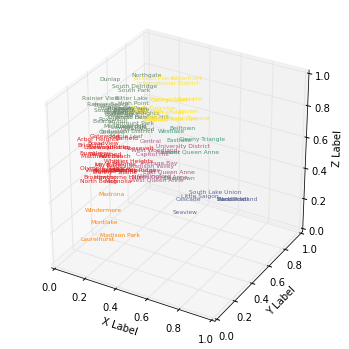

In [72]:
rf_z.plot_embedding()